In [1]:
#Start here

#Copy ABT file to local google colab storage
!gdown --id 1MNg2_7wvuCdQ7i8dCTUn6soowTwwst22
!gdown --id 1sP8l5a1lv7BtM_hWMVTpx-HhNJVitLCe

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MNg2_7wvuCdQ7i8dCTUn6soowTwwst22
To: /content/history_cleaned.csv
100% 89.0k/89.0k [00:00<00:00, 67.8MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1sP8l5a1lv7BtM_hWMVTpx-HhNJVitLCe 



In [2]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [3]:

# Load cleaned file
df = pd.read_csv('history_cleaned.csv')
print("Shape",df.shape)

Shape (585, 20)


In [4]:
df.head()

,Unnamed: 0,Time,Gender,Age,Course,Field of Study,Used e-learning services before,what type of e-learning services are provided by university,How useful it is,Increases productivity,Saves time,Efficient,Easy,Convenient,Easy to gather information using it,Requires training,Will you use it in future,How likely you would be using it in your daily life,Frequent use,Predict how much you will be using it in future
0,0,3/29/2020 22:58,Male,18-22 Years,Undergraduate,Languages and Arts,No,"Access learning resources, and interact with m...",2,2,2,2,2,5,5,5,5,4,4,4
1,1,3/29/2020 23:00,Male,More than 30 Years,Undergraduate,Business,Yes,"Access learning resources, and know the date a...",5,5,5,5,5,4,5,3,3,5,5,5
2,2,3/29/2020 23:31,Male,23-21 Years,Undergraduate,Business,No,"Access learning resources, and interact with m...",1,1,1,1,1,1,1,2,1,1,1,1
3,3,3/29/2020 23:33,Male,23-21 Years,Undergraduate,Engineering,No,Access learning resources only,1,1,1,1,4,1,1,5,3,1,1,1
4,4,3/29/2020 23:34,Female,23-21 Years,Undergraduate,Languages and Arts,No,"Access learning resources, and interact with m...",1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
df=df[df['Course']=='Undergraduate']

In [6]:
df=df[['Saves time','Increases productivity','Convenient']]

In [7]:
# input matrix for clustering
X = df.values

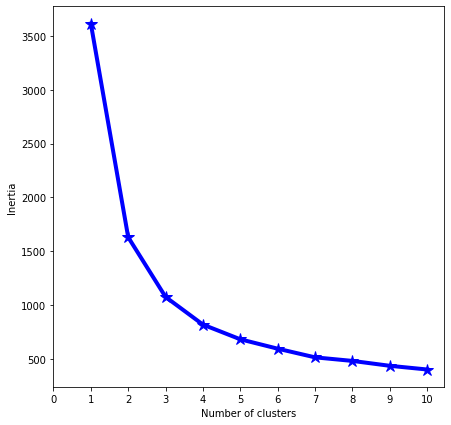

In [8]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='*',color = 'blue')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [9]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
clusters = model.fit_predict(X)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



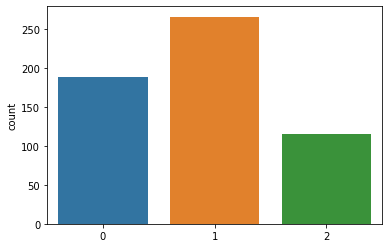

In [10]:
sns.countplot(clusters)

In [13]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Saves time-->'),yaxis = dict(title  = 'Increases productivity--->'),zaxis = dict(title  = '<--Convenient'))

labels = model.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()
